In [98]:
# Raw Package
import numpy as np
import pandas as pd

# Market Data 
import yfinance as yf

#Graphing/Visualization
import datetime as dt 
import plotly.graph_objs as go 

# Override Yahoo Finance 
yf.pdr_override()


symbol_crypto = "BTC-USD"


# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
df = yf.download(tickers=symbol_crypto,period='1d',interval='1m')

##Actualmente Central European Summer Time (CEST), UTC +2, por lo que en el gráfico aparece como -2 horas (UTC).

# Declare plotly figure (go)
fig=go.Figure()

fig.add_trace(go.Scatter(x=df.index,
                y=df['Close'], name = 'market data'))

fig.update_layout(
    title= str(symbol_crypto)+' Live Share Price:',
    yaxis_title='Closing Price (USD per Shares)')               

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show();


[*********************100%***********************]  1 of 1 completed


In [100]:
startdate = dt(2017,8,4)
end_date = dt.today()

data = yf.download(symbol_crypto, start='2010-01-01',
                end=date.today())
#data = data.reset_index()
data

NameError: name 'date' is not defined

In [232]:
import numpy as np
import pandas as pd
import yfinance as yf
#import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
import plotly.graph_objects as go
import plotly.offline as pyo

plt.style.use('fivethirtyeight')
yf.pdr_override()


data = yf.download(symbol_crypto, start='2010-01-01',
                end=date.today())
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'])

########### Simple Moving Average Implementation #############


data['SMA 20'] = data['Close'].rolling(window=20).mean()
data['SMA 100'] = data['Close'].rolling(window=100).mean()

df.rolling(window=30).mean()
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 20'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 20'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])


data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)



"""

ax.set_title(stock[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()
"""


# Create figure
fig = go.Figure()

actual_prices_plot = go.Scatter(name=symbol_crypto,x=data.Date, y=data['Adj Close'], line_color='#F1A537')
sma20_plot = go.Scatter(name='SMA20',x=data.Date, y=data['SMA 20'],line_color="#0000ff")
sma100_plot = go.Scatter(name='SMA100',x=data.Date, y=data['SMA 100'])
Buy_Signal_plot = go.Scatter(mode="markers", name='Buy',x=data.Date, y=data['Buy_Signal_price'] , line_color='green', marker_symbol = 'triangle-up', marker_size=10)
Sell_Signal_plot = go.Scatter(mode="markers", name='Sell',x=data.Date, y=data['Sell_Signal_price'] , line_color='red', marker_symbol = 'triangle-down', marker_size=10)


# Set title
fig.update_layout(title_text=symbol_crypto[0] + " Price History with buy and sell signals")

data = [actual_prices_plot,sma20_plot,sma100_plot,Buy_Signal_plot,Sell_Signal_plot]
fig = dict(data=data)
#fig.layout.update()
pyo.iplot(fig, filename='temp1')


[*********************100%***********************]  1 of 1 completed


In [4]:
import requests
from bs4 import BeautifulSoup
import json
import re

url = 'https://cryptonews-api.com/api/v1?tickers='+ (re.split('-', 'BTC'))[0] + '&items=50&page=1&token=u7pvihvex531i03ya2urh3sscf2pcj50k3uxzyu2'
html_response = requests.get(url).content
soup = BeautifulSoup(html_response, "html.parser") 
soup

{"message":"The given data was invalid.","errors":{"items":["The items may not be greater than 50. For more news items use our page parameter &amp;page=2"]}}

In [9]:
site_json=json.loads(soup.text)
site_json['data']
news = pd.DataFrame(site_json['data'])
news.head()

,news_url,image_url,title,text,source_name,date,topics,sentiment,type,tickers
0,https://thenewscrypto.com/bitcoin-btc-prices-e...,https://crypto.snapi.dev/images/v1/w/e/bitcoin...,Bitcoin (BTC) Prices Enters Correction Phase A...,"According to the BTC daily chart, an upward mo...",TheNewsCrypto,"Fri, 29 Apr 2022 06:57:19 -0400",[],Negative,Article,[BTC]
1,https://ambcrypto.com/eths-correlation-to-sp-5...,https://crypto.snapi.dev/images/v1/r/y/ryan-pl...,ETH's correlation to S&P 500 and ‘climbing' wh...,The crypto market persisted in following the s...,AMBCrypto,"Fri, 29 Apr 2022 06:30:26 -0400",[whales],Neutral,Article,[ETH]
2,https://en.cryptonomist.ch/2022/04/29/ripple-x...,https://crypto.snapi.dev/images/v1/8/j/ripple-...,"Ripple (XRP) price still falling, SEC's fault?","Despite some good news, there was no recovery",The Cryptonomist,"Fri, 29 Apr 2022 06:16:15 -0400",[regulations],Negative,Article,[XRP]
3,https://www.theblockcrypto.com/post/144303/lab...,https://crypto.snapi.dev/images/v1/l/i/2020121...,Labor Department has ‘grave concerns' over Fid...,"The US Labor Department has ""grave concerns"" a...",The Block,"Fri, 29 Apr 2022 06:15:54 -0400",[],Negative,Article,[BTC]
4,https://coinpedia.org/bitcoin/btc-price-to-fol...,https://crypto.snapi.dev/images/v1/i/k/bitcoin...,Bitcoin Dejavu: BTC Price To Follow 2018 Patte...,A closely followed crypto analyst and a trader...,CoinPedia,"Fri, 29 Apr 2022 06:09:34 -0400",[],Negative,Article,[BTC]


In [224]:
negative = news['sentiment'].isin(['Negative']).sum(axis=0)
positive = news['sentiment'].isin(['Positive']).sum(axis=0)
neutral = news['sentiment'].isin(['Neutral']).sum(axis=0)

In [238]:
len(news)

50

In [93]:
url = 'https://cryptonews-api.com/api/v1/stat?&tickers=BTC&date=last30days&page=1&token=u7pvihvex531i03ya2urh3sscf2pcj50k3uxzyu2'
#url = 'https://cryptonews-api.com/api/v1/stat?&tickers='+ (re.split('-', symbol_crypto))[0] + '&date=last30days&page=1&token=u7pvihvex531i03ya2urh3sscf2pcj50k3uxzyu2'
html_response = requests.get(url).content
soup = BeautifulSoup(html_response, "html.parser") 
site_json2=json.loads(soup.text)
site_json2

{'total': {'BTC': {'Total Positive': 1058,
   'Total Negative': 663,
   'Total Neutral': 1052,
   'Sentiment Score': 0.214}},
 'data': {'2022-04-29': {'BTC': {'Neutral': 11,
    'Positive': 9,
    'Negative': 16,
    'sentiment_score': -0.292}},
  '2022-04-28': {'BTC': {'Neutral': 45,
    'Positive': 63,
    'Negative': 18,
    'sentiment_score': 0.536}},
  '2022-04-27': {'BTC': {'Neutral': 67,
    'Positive': 52,
    'Negative': 33,
    'sentiment_score': 0.188}},
  '2022-04-26': {'BTC': {'Neutral': 46,
    'Positive': 72,
    'Negative': 21,
    'sentiment_score': 0.55}},
  '2022-04-25': {'BTC': {'Neutral': 33,
    'Positive': 35,
    'Negative': 34,
    'sentiment_score': 0.015}},
  '2022-04-24': {'BTC': {'Neutral': 17,
    'Positive': 14,
    'Negative': 17,
    'sentiment_score': -0.094}},
  '2022-04-23': {'BTC': {'Neutral': 23,
    'Positive': 12,
    'Negative': 18,
    'sentiment_score': -0.17}},
  '2022-04-22': {'BTC': {'Neutral': 40,
    'Positive': 13,
    'Negative': 39,
  

In [96]:
sentiments2 = pd.DataFrame(site_json2['data'])
sentiments2.T

,BTC
2022-04-29,"{'Neutral': 11, 'Positive': 9, 'Negative': 16,..."
2022-04-28,"{'Neutral': 45, 'Positive': 63, 'Negative': 18..."
2022-04-27,"{'Neutral': 67, 'Positive': 52, 'Negative': 33..."
2022-04-26,"{'Neutral': 46, 'Positive': 72, 'Negative': 21..."
2022-04-25,"{'Neutral': 33, 'Positive': 35, 'Negative': 34..."
2022-04-24,"{'Neutral': 17, 'Positive': 14, 'Negative': 17..."
2022-04-23,"{'Neutral': 23, 'Positive': 12, 'Negative': 18..."
2022-04-22,"{'Neutral': 40, 'Positive': 13, 'Negative': 39..."
2022-04-21,"{'Neutral': 32, 'Positive': 43, 'Negative': 23..."
2022-04-20,"{'Neutral': 36, 'Positive': 48, 'Negative': 20..."


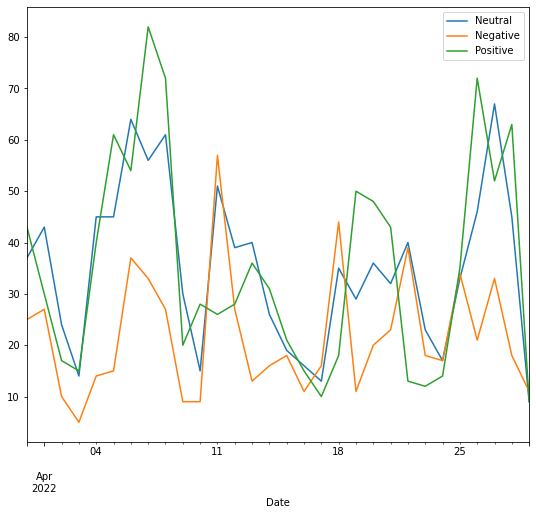

In [90]:
sentiments = pd.DataFrame(site_json['data'])
sentiments = sentiments.T

neutral = []
positive = []
negative = []
i = 0
while i < len(sentiments):
    neutral.append(news.iloc[i].get('BTC').get('Neutral'))
    positive.append(news.iloc[i].get('BTC').get('Positive'))
    negative.append(news.iloc[i].get('BTC').get('Negative'))
    i+= 1

sent_df = pd.DataFrame(list(zip(list(sentiments.index),neutral, positive, negative)),
               columns =['Date','Neutral', 'Positive', 'Negative'])
sent_df['Date'] = pd.to_datetime(sent_df['Date'])
sent_df.plot(x="Date", y=["Neutral", "Negative", "Positive"], kind="line", figsize=(9, 8));